In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [79]:
# Read the file
file_path = '2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())

  User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                         5                       80   
1    U002                         8                       60   
2    U003                         3                       90   
3    U004                         7                       70   
4    U005                         2                       50   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                              3                                    10   
1                              1                                     8   
2                              0                                     6   
3                              2                                    15   
4                              5                                     3   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                      120                                       20  
1                      100    

In [80]:
# Data cleaning
df.dropna(inplace=True)

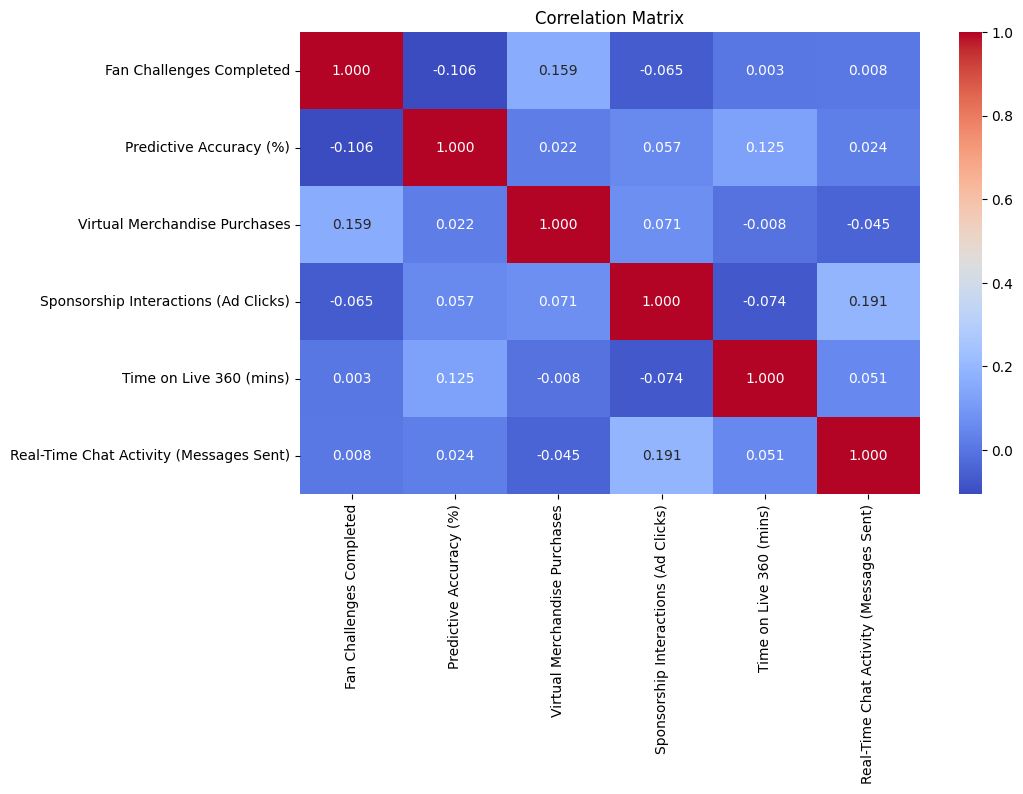

In [82]:
# Data analysis
# Which users are most likely to purchase virtual merchandise?  
# How do user activities during race events correlate with their merchandise purchases and sponsorship interaction?

# Perason correlation coefficient
corr_matrix = df.loc[:, df.columns != 'User ID'].corr()
# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

## There is a weak positive correlation between Real-Time Chat Activity (Messages Sent) and Sponsorship Interactions (Ad Clicks) (r = 0.191).
## There is a weak positive correlation between Fan Challenges Completed and Virtual Merchandise Purchases (r = 0.159). 

In [91]:
# Classification - Logistic Regression 
# Target variable is 'Virtual Merchandise Purchases'
for col in df.columns:
    if col != 'User ID' and col != 'Virtual Merchandise Purchases':
        # Define feature and target variable
        X = df[[col]]
        y = df['Virtual Merchandise Purchases'] > 0  # Convert purchases to binary outcome (purchase or no purchase)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit logistic regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)

        # Get the feature coefficient
        coefficient = model.coef_[0][0]

        print(f"Feature: {col} - Accuracy: {model.score(X_test, y_test)} - Coefficient: {coefficient}")

Feature: Fan Challenges Completed - Accuracy: 0.9 - Coefficient: 0.06717548064004031
Feature: Predictive Accuracy (%) - Accuracy: 0.9 - Coefficient: -0.008133865040091632
Feature: Sponsorship Interactions (Ad Clicks) - Accuracy: 0.9 - Coefficient: 0.055350478831253824
Feature: Time on Live 360 (mins) - Accuracy: 0.9 - Coefficient: 0.005359105792291934
Feature: Real-Time Chat Activity (Messages Sent) - Accuracy: 0.9 - Coefficient: 0.0026911569291495556


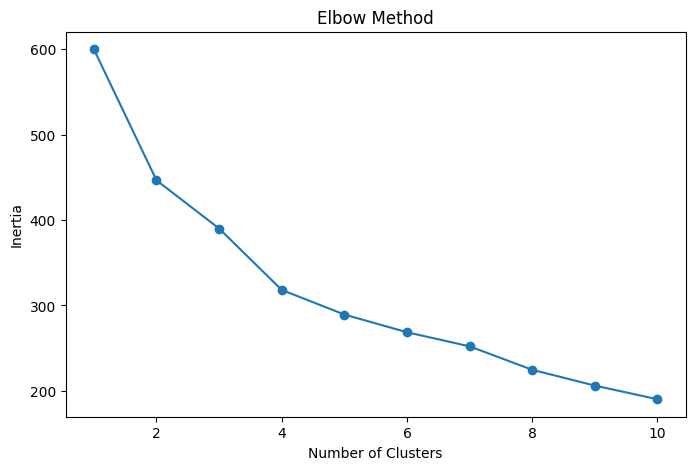

Cluster Counts:
Cluster
4    24
3    21
1    19
2    18
0    18
Name: count, dtype: int64
Cluster
0    3.111111
1    3.105263
2    2.333333
3    2.857143
4    2.083333
Name: Virtual Merchandise Purchases, dtype: float64


In [94]:
# Clustering

# The features used for clustering
features = [col for col in df.columns if col != 'User ID' and col != 'Virtual Merchandise Purchases']

# Standardizing the data before clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Elbow method for determining the number of clusters
def elbow_method(X):
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

elbow_method(scaled_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Check the clusters
print("Cluster Counts:")
print(df['Cluster'].value_counts())

print(df.groupby('Cluster')['Virtual Merchandise Purchases'].mean())
